### 판다스 전처리

In [85]:
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns

#### 데이터셋 로드

Seaborn에 타이타닉 데이터셋 샘플 로드 가능

https://github.com/mwaskom/seaborn-data 에서 확인할 것

In [86]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


##### 전처리 전 확인

In [87]:
## NaN : Not a Number == Null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [88]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


##### 컬럼(columns) 설명

- survivied: 생존여부 (1: 생존, 0: 사망)
- pclass: 좌석 등급 (1등급, 2등급, 3등급)
- sex: 성별
- age: 나이
- sibsp: 형제 + 배우자 수
- parch: 부모 + 자녀 수
- fare: 좌석 요금
- embarked: 탑승 항구 (S, C, Q)
- class: pclass와 동일
- who: 성별과 동일
- adult_male: 성인 남자 여부
- deck: 데크 번호 (알파벳 + 숫자 혼용)
- embark_town: 탑승 항구 이름
- alive: 생존여부 (yes, no)
- alone: 혼자 탑승 여부

##### 새 컬럼 추가

In [89]:
df_titanic = df.copy()
df_titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [170]:
df_titanic.deck.unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [90]:
df_titanic['vip'] = True
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,vip
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True


In [172]:
## 생존자수 사망자수 확인
survival = df_titanic.survived.sum()
survival

342

In [175]:
## 사망자수
died = df_titanic.shape[0] - survival
died

549

In [176]:
## 클래스별 탑승객 분포
df_titanic.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

#### 삭제 

삭제는 행(row) 삭제와 열(column) 삭제로 구분

##### 행(row)삭제

인덱스 지정하여 삭제

In [91]:
## 1번 행 삭제
df.drop(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [92]:
## 0번에서 10번까지 행삭제
df.drop(df.index[0:10])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


##### 하지만 실제 삭제된 것은 아님

inplace 속성 사용 또는 다른 변수에 할당할 것

In [93]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [94]:
## 인덱싱으로 삭제
df.drop(df.index[[1, 3, 5, 7, 9]])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


##### 열(column)삭제

In [95]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [96]:
## dect 컬럼 삭제
df.drop('deck', axis=1).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [97]:
## 차후에는 위와 같이 써야 함. axis=1 로 안쓰면 차후버전에서는 오류날 예정
df.drop('deck', 1).head()

C:\Users\perso\AppData\Local\Temp\ipykernel_16268\3640068335.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('deck', 1).head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


##### 다수 컬럼 삭제가능

In [98]:
df.drop(['who', 'deck', 'alive'], axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,First,False,Southampton,True
888,0,3,female,NaN,1,2,23.4500,S,Third,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,First,True,Cherbourg,True


#### 컬럼 간 연산

컬럼(column) 과 컬럼 사이의 연산을 적용 가능

In [99]:
df1 = df.copy()

In [100]:
df1['family'] = df1['sibsp'] + df1['parch']
df1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


In [101]:
## Concatenation
df1['gender'] = df1['who'] + '-' + df1['sex']
df1.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family,gender
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,0,man-male
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,0,woman-female
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,3,woman-female
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,0,man-male
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,0,man-male


In [102]:
## 1개 컬럼이라도 NaN 
df1.loc[df1['age'].isnull(), 'deck':].head()

,deck,embark_town,alive,alone,family,gender
5,NaN,Queenstown,no,True,0,man-male
17,NaN,Southampton,yes,True,0,man-male
19,NaN,Cherbourg,yes,True,0,woman-female
26,NaN,Cherbourg,no,True,0,man-male
28,NaN,Queenstown,yes,True,0,woman-female


##### 타입변환

In [103]:
df2= df.copy()
df2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [104]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [105]:
## pclass를 int64 에서 float64로 변경
df2['pclass'].astype('float64').head()

0    3.0
1    1.0
2    3.0
3    1.0
4    3.0
Name: pclass, dtype: float64

In [106]:
df2.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

##### 판다스에서 사용할 수 있는 타입종류

- int
    - int16 (short)
    - int32 (int)
    - int64
- float
    - float16
    - float32 (float)
    - float64 (double)
- category
- bool
- object
    - str
- string
- datetime64
    

In [107]:
## category 사용
df2['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [108]:
df2['who'].dtype

dtype('O')

In [109]:
df2['who'].astype('category').head()

0      man
1    woman
2    woman
3    woman
4      man
Name: who, dtype: category
Categories (3, object): ['child', 'man', 'woman']

- 타입을 category로 변환했다면 .cat으로 접근하여 category 타입이 제공하는 attribute를 사용 가능

In [110]:
df2['who'].astype('category').dtype

CategoricalDtype(categories=['child', 'man', 'woman'], ordered=False)

In [111]:
df2['who'].astype('category').cat.codes

0      1
1      2
2      2
3      2
4      1
      ..
886    1
887    2
888    2
889    1
890    1
Length: 891, dtype: int8

In [112]:
df2['who'] = df2['who'].astype('category')

In [113]:
df2['who'].cat.categories

Index(['child', 'man', 'woman'], dtype='object')

##### 카테고리 이름 변경

In [114]:
["Group (%s)" % g for g in df2['who'].cat.categories]

['Group (child)', 'Group (man)', 'Group (woman)']

In [115]:
## Will be deprecated --> 앞으로 쓰지마셈
df2['who'].cat.categories = ["Group (%s)" % g for g in df2['who'].cat.categories]
df2['who'].value_counts()

C:\Users\perso\AppData\Local\Temp\ipykernel_16268\3755514258.py:2: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  df2['who'].cat.categories = ["Group (%s)" % g for g in df2['who'].cat.categories]


Group (man)      537
Group (woman)    271
Group (child)     83
Name: who, dtype: int64

##### Datetime

- data_range 주요값
    - start: 시작 날짜
    - end: 끝 날짜
    - periods: 생성할 데이터 개수
    - freq: 주기

In [116]:
## 3시간 주기로 날짜 데이터를 생성
dates = pd.date_range('20231014', periods=df2.shape[0], freq='3H')
dates.shape

(891,)

In [117]:
df3 = df2.copy()
df3.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,Group (man),True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,Group (woman),False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,Group (woman),False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,Group (woman),False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,Group (man),True,NaN,Southampton,no,True


In [118]:
df3['date'] = dates
df3

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,date
0,0,3,male,22.0,1,0,7.2500,S,Third,Group (man),True,NaN,Southampton,no,False,2023-10-14 00:00:00
1,1,1,female,38.0,1,0,71.2833,C,First,Group (woman),False,C,Cherbourg,yes,False,2023-10-14 03:00:00
2,1,3,female,26.0,0,0,7.9250,S,Third,Group (woman),False,NaN,Southampton,yes,True,2023-10-14 06:00:00
3,1,1,female,35.0,1,0,53.1000,S,First,Group (woman),False,C,Southampton,yes,False,2023-10-14 09:00:00
4,0,3,male,35.0,0,0,8.0500,S,Third,Group (man),True,NaN,Southampton,no,True,2023-10-14 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,Group (man),True,NaN,Southampton,no,True,2024-02-01 18:00:00
887,1,1,female,19.0,0,0,30.0000,S,First,Group (woman),False,B,Southampton,yes,True,2024-02-01 21:00:00
888,0,3,female,NaN,1,2,23.4500,S,Third,Group (woman),False,NaN,Southampton,no,False,2024-02-02 00:00:00
889,1,1,male,26.0,0,0,30.0000,C,First,Group (man),True,C,Cherbourg,yes,True,2024-02-02 03:00:00


In [119]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   survived     891 non-null    int64         
 1   pclass       891 non-null    int64         
 2   sex          891 non-null    object        
 3   age          714 non-null    float64       
 4   sibsp        891 non-null    int64         
 5   parch        891 non-null    int64         
 6   fare         891 non-null    float64       
 7   embarked     889 non-null    object        
 8   class        891 non-null    category      
 9   who          891 non-null    category      
 10  adult_male   891 non-null    bool          
 11  deck         203 non-null    category      
 12  embark_town  889 non-null    object        
 13  alive        891 non-null    object        
 14  alone        891 non-null    bool          
 15  date         891 non-null    datetime64[ns]
dtypes: bool(

##### datetime 하위속성

datetime 타입에서는 dt 접근자로 아래의 날짜속성 접근가능
- pandas.Series.dt.year: 연도
- pandas.Series.dt.month: 월
- pandas.Series.dt.day: 일
- pandas.Series.dt.hour: 시
- pandas.Series.dt.minute: 분
- pandas.Series.dt.second: 초
- pandas.Series.dt.microsecond: micro 초
- pandas.Series.dt.nanosecond: nano 초
- pandas.Series.dt.week: 주
- pandas.Series.dt.weekofyear: 연중 몇 째주
- pandas.Series.dt.dayofweek: 요일
- pandas.Series.dt.weekday: 요일 (dayofweek과 동일)
- pandas.Series.dt.dayofyear: 연중 몇 번째 날
- pandas.Series.dt.quarter: 분기

In [121]:
df3['date'].dt.year.head()

0    2023
1    2023
2    2023
3    2023
4    2023
Name: date, dtype: int64

In [122]:
df3['date'].dt.month.tail()

886    2
887    2
888    2
889    2
890    2
Name: date, dtype: int64

In [124]:
df3['date'].dt.day.head()

0    14
1    14
2    14
3    14
4    14
Name: date, dtype: int64

dayofweek는 숫자로 요일이 표기

월요일: 0, 일요일: 6

In [126]:
df3['date'].dt.dayofweek.tail()

886    3
887    3
888    4
889    4
890    4
Name: date, dtype: int64

##### 구간 나누기

연속된 수치(continuous values)를 구간으로 나누어 카테고리화

In [127]:
df3.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,date
0,0,3,male,22.0,1,0,7.2500,S,Third,Group (man),True,NaN,Southampton,no,False,2023-10-14 00:00:00
1,1,1,female,38.0,1,0,71.2833,C,First,Group (woman),False,C,Cherbourg,yes,False,2023-10-14 03:00:00
2,1,3,female,26.0,0,0,7.9250,S,Third,Group (woman),False,NaN,Southampton,yes,True,2023-10-14 06:00:00
3,1,1,female,35.0,1,0,53.1000,S,First,Group (woman),False,C,Southampton,yes,False,2023-10-14 09:00:00
4,0,3,male,35.0,0,0,8.0500,S,Third,Group (man),True,NaN,Southampton,no,True,2023-10-14 12:00:00


In [128]:
## fare를 구간화 시작
df3.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [130]:
## fare 의 최소와 최대 차이가 많이 남
df3['fare_cut'] = pd.cut(df3['fare'], bins=10)

In [131]:
df3['fare_cut'].value_counts()

(-0.512, 51.233]      732
(51.233, 102.466]     106
(102.466, 153.699]     31
(204.932, 256.165]     11
(256.165, 307.398]      6
(461.096, 512.329]      3
(153.699, 204.932]      2
(307.398, 358.63]       0
(358.63, 409.863]       0
(409.863, 461.096]      0
Name: fare_cut, dtype: int64

##### 위의 결과

10개의 구분 중에 한두군데에만 집중된 것이 아니기 때문에 상관없지만, 한 곳에 데이터가 급격히 모이는 문제가 발생할 수 있음

pd.cut()은 최소에서 최대 구간을 지정한 bin만큼 동일하게 분할 하기 때문에 이런 현상이 발생가능

이상치(outlier)로 튀는 경우

![outlier](https://raw.githubusercontent.com/hugoMGSung/bigdata-analysis-2023/main/Images/bigdata004.jpg)

In [133]:
## pd.qcut() - 동일한 갯수를 갖도록 구간 분할
df3['fare_qcut'] = pd.qcut(df3['fare'], q=10)

In [135]:
df3['fare_qcut'].value_counts()

(7.854, 8.05]        106
(-0.001, 7.55]        92
(27.0, 39.688]        91
(21.679, 27.0]        89
(39.688, 77.958]      89
(14.454, 21.679]      88
(7.55, 7.854]         87
(77.958, 512.329]     87
(10.5, 14.454]        84
(8.05, 10.5]          78
Name: fare_qcut, dtype: int64

#### 주요 전처리

##### NaN값 전처리

필요 라이브러리 - missingno

In [137]:
!pip install missingno

In [138]:
import missingno as msno 

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<Axes: >

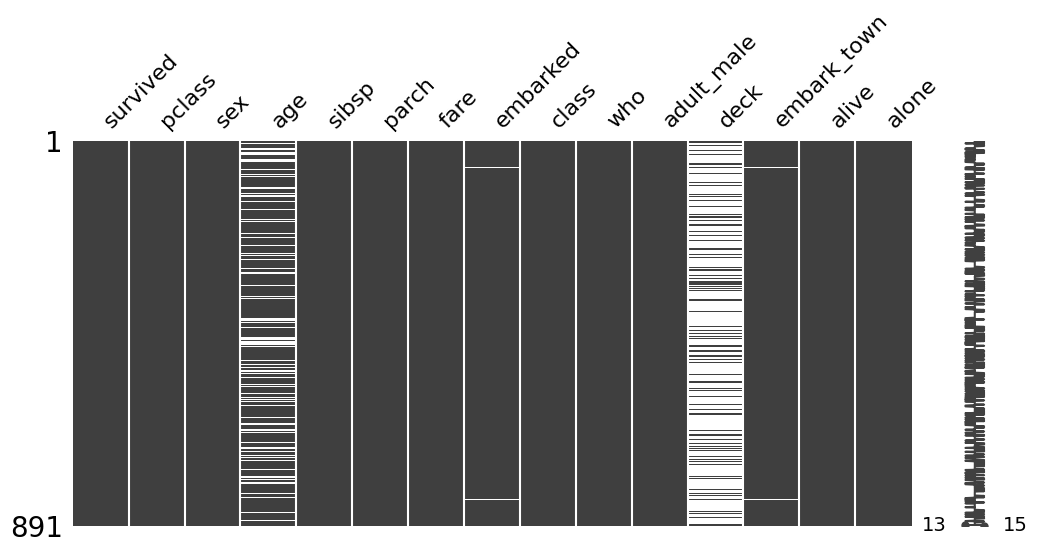

In [141]:
## NaN 확인 using missingno
msno.matrix(df, figsize=(12, 5))

##### 전처리 대상

age, embarked, deck, embarked_town 중

embarked... 는 간단히 전처리 가능

- 확인하기

In [142]:
for col in df.columns:
    na = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df[col].isnull().sum() / df[col].shape[0]))
    print(na)

column:   survived	 Percent of NaN value: 0.00%
column:     pclass	 Percent of NaN value: 0.00%
column:        sex	 Percent of NaN value: 0.00%
column:        age	 Percent of NaN value: 19.87%
column:      sibsp	 Percent of NaN value: 0.00%
column:      parch	 Percent of NaN value: 0.00%
column:       fare	 Percent of NaN value: 0.00%
column:   embarked	 Percent of NaN value: 0.22%
column:      class	 Percent of NaN value: 0.00%
column:        who	 Percent of NaN value: 0.00%
column: adult_male	 Percent of NaN value: 0.00%
column:       deck	 Percent of NaN value: 77.22%
column: embark_town	 Percent of NaN value: 0.22%
column:      alive	 Percent of NaN value: 0.00%
column:      alone	 Percent of NaN value: 0.00%


In [143]:
## age와 embarked 채워넣기, deck 변수 제거

In [144]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [146]:
df[df['age']>0]['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: age, Length: 714, dtype: float64

In [149]:
pd.cut(df3['age'], bins=10).value_counts()
## 결과로 20대중반~30대초반, 30대초반~40대가 가장 많은 분포를 가지고 있는 것을 확인

(16.336, 24.294]    177
(24.294, 32.252]    169
(32.252, 40.21]     118
(40.21, 48.168]      70
(0.34, 8.378]        54
(8.378, 16.336]      46
(48.168, 56.126]     45
(56.126, 64.084]     24
(64.084, 72.042]      9
(72.042, 80.0]        2
Name: age, dtype: int64

In [151]:
df3['embarked'].value_counts()
## S가 가장 많은 것으로 확인
## S = Southampton, C = Cherbourg, Q = Queenstown 

S    644
C    168
Q     77
Name: embarked, dtype: int64

##### 결론
위를 통해서 전처리, 컬럼 삭제(deck), Age와 Embarked는 NA를 최대값으로 채워넣는 것을 추천

In [157]:
## deck 컬럼삭제
df.drop('deck', axis=1, inplace=True)

KeyError: "['deck'] not found in axis"

In [158]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [159]:
## embarked는 S, Southampton 으로 채우기
df['embarked'].replace({np.nan:'S'} , inplace = True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [161]:
df['embark_town'].replace({np.nan:'Southampton'} , inplace = True)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [163]:
## age 필드는 중간값으로 할당
df['age'] = df['age'].fillna(df['age'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


#### EDA

...